1. Standard deviation describes the degree to which an individual data point deviates from the mean of a data set by measuring the distribution and variability of individual data points around the mean. It indicates the variability of the data itself and does not decrease with increasing sample size. The standard error of the mean, on the other hand, measures the degree to which the sample mean deviates from the actual overall mean and decreases as the sample size increases. The standard deviation captures the distribution or variability of the individual data points in the data set, and the standard error of the mean captures the precision of the sample mean used to estimate the actual overall data mean.

link of chat log histories: https://chatgpt.com/share/66fe3ccb-7908-800e-b2ae-fec9a6959249

2. The first step is to perform bootstrap sampling, generating multiple samples from the original dataset by randomly selecting observations with replacement features. This step simulates the case of sampling from the overall dataset, thus estimating the overall characteristics using a limited sample of data. The second step is to compute the sample means, since each sample mean is derived from a different sampling process and represents a different estimate of the overall mean, i.e., the variation in the mean is obtained by capturing the distribution of the means. The third step is to calculate the standard error of the mean, which is the degree of deviation from the sample mean. The confidence level of the estimate of the overall mean is obtained by measuring the magnitude of the deviation. The fourth step is to determine a confidence interval by finding the 2.5% and 97.5% quantiles of the self-help sample mean. This interval captures 95% of the distribution of the sample mean and also responds to the uncertainty of the mean estimate. The fifth step is the resulting confidence interval, which is the 95% confidence interval obtained that represents the estimate of the overall mean. This interval not only provides the estimate, but also takes into account the error caused by the uncertainty of the data.

In [ ]:
link of chat log histories: https://chatgpt.com/share/66fe46c0-83ec-800e-9cde-c0f45b1dadeb

3. By sorting the means, we can find the 2.5th and 97.5th percentiles of the bootstrap mean distribution to use as the lower and upper bounds to construct 95% confidence intervals. This allows us to use the distribution of bootstrap means directly without estimating standard errors.

4.

In [2]:
import numpy as np

def bootstrap_ci(data, stat_function=np.mean, num_resamples=10000, ci=95):
    """
    Generate a bootstrap confidence interval for a population parameter.

    Parameters:
    - data: array-like, the original sample data.
    - stat_function: function, the statistic to compute from resampled data (default is np.mean).
                    To change the parameter (e.g., median), pass np.median.
    - num_resamples: int, number of bootstrap resamples to perform (default is 10,000).
    - ci: float, the confidence level (default is 95 for a 95% confidence interval).

    Returns:
    - (lower_bound, upper_bound): tuple of floats, the lower and upper bounds of the confidence interval.
    """
    # Generate new samples by randomly drawing from the original data (with replacement).
    resamples = np.random.choice(data, (num_resamples, len(data)), replace=True)
    
    # Calculate the statistic (such as mean or median) for each of the resampled datasets.
    stat_values = np.array([stat_function(sample) for sample in resamples])
    
    # Calculate the percentiles that define the lower and upper bounds of the confidence interval.
    lower_percentile = (100 - ci) / 2
    upper_percentile = 100 - lower_percentile
    lower_bound = np.percentile(stat_values, lower_percentile)
    upper_bound = np.percentile(stat_values, upper_percentile)
    
    return lower_bound, upper_bound


# Example usage:
# Sample data
data = [5, 10, 15, 20, 25, 30, 35]

# 95% confidence interval for the population mean
mean_ci = bootstrap_ci(data)
print(f"95% Bootstrap CI for the population mean: {mean_ci}")

# To compute a confidence interval for the population median instead of the mean:
median_ci = bootstrap_ci(data, stat_function=np.median)
print(f"95% Bootstrap CI for the population median: {median_ci}")

95% Bootstrap CI for the population mean: (12.857142857142858, 27.142857142857142)
95% Bootstrap CI for the population median: (10.0, 30.0)


In [ ]:
link of chat log histories: https://chatgpt.com/share/66fef52f-b9f4-800e-810f-c4d5eff27657

5. The population parameter (such as the true mean or median) is the fixed unknown value we are trying to estimate, whereas the sample statistic (such as the sample mean or median) is the value calculated from a sample of the data, is the best estimate of the population parameter, and may be biased by the variability of the sampling. That is, confidence intervals use the variability of the sample statistic to give a range of plausible values for the unknown overall parameter, and the intervals are intended to make inferences about the overall population, not about the sample itself.

In [ ]:
link of chat log histories: https://chatgpt.com/share/66ff0eb2-524c-800e-b427-f8717c960077

6. 
    1. When we lack a large amount of data to compute and analyze when dealing with data from the same population, bootstrapping can iterate over and over again using small datasets in different ways to get a larger dataset. After randomly selecting data points from a sample of small datasets we can put the selected data points back into the small dataset before selecting the next data point. In this way the selected data points can be selected repeatedly, and we can also obtain many new bootstrapping samples of the same size as the samples of the original mini-dataset by randomly selecting duplicates many times. Then since each bootstrap sample can be used as a separate dataset, we are able to use them to compute any statistical data (e.g. median or mean). After analyzing different datasets several times over we are able to obtain the distribution of the data, which means that the overall data can be analyzed with a limited number of small datasets.
    2. The main purpose of bootstrapping is to help us estimate the uncertainty of a statistic (such as the mean) when there is a lack of a large sample of data to analyze when analyzing an aggregate, or to estimate the bias of a statistic (such as the mean) when there is an error in the dataset due to a variety of circumstances. This gives us more confidence in the resulting statistic because we can get a range of possible values for the statistic and the extent to which it may vary due to errors in the sample data.
    3. Suppose we have a guess that Alice drinks 10 cups of coffee per month, that is, a guess that the average of the number of cups of coffee Alice drinks per month is 10. And we have recorded data on how many cups of coffee Alice drank each month for the past seven months: 8 cups, 7 cups, 10 cups, 9 cups, 8 cups, 12 cups, and 11 cups. Bootstraping method can conveniently help us determine whether Alice's guess of 10 cups of coffee per month is a reasonable one. First calculate the average number of cups of coffee drunk in those seven months, which is 9 cups. Then we sampled multiple times through the bootstrap in the seven data from those seven months to obtain different bootstraping datasets by random selection. Since we put the extracted data back for sampling, we can get an endless number of sampling datasets. For example, we can take 100 bootstrap samples and compute the average value obtained each time to get 100 different average cups. Finally, we compare the distribution of the 100 averages with the guessed average, calculated using the original sample. If in most cases the mean is similar to 9 cups (the mean calculated using the original sample), then our hypothetical guess is not reasonable. If the mean is similar to 10 cups in most cases (the mean of the guess), then our hypothesized guess is reasonable.

7. This is because confidence intervals provide us with a range of plausible values based on our sample data, allowing us to assume that the true overall parameter (such as the average effect of a drug) lies within the range of the confidence interval. When the confidence interval includes zero, it indicates that the data does not confidently prove that the drug has only negative or positive effects, and that the true average effect (mean) it indicates may also be zero, which means no effects. At the same time, not being able to reject the null hypothesis does not mean that the null hypothesis is necessarily correct, it just means that we cannot confidently conclude that the drug has a negative or positive effect. If we can conclude that the null hypothesis is rejected, the confidence intervals need to not overlap zero, which means that the data of zero is completely excluded. In ensuring that the confidence intervals do not overlap zero, we can also reject the null hypothesis if the location of the observed sample mean is very far from zero.

8.
    1. Problem Introduction:
        The company AliTech has developed a new vaccine designed to improve the health of those who take it. To determine the effectiveness of the vaccine, we analyzed data from 10 patients by comparing their initial health scores to their final health scores after receiving the vaccine. The goal of this data analysis report is to provide proof and analysis of whether the vaccine significantly improved health outcomes.
    
        1.1) Explaination of the meaning of a Null Hypothesis of "no effect"
            In this data analysis, the null hypothesis (H₀) states that the vaccine has no effect on an individual's health score, meaning that the vaccine has a null effect on the health of the patient taking it. This implies that the mean difference between the initial run status score and the final run status score is zero. Therefore, if we can reject the null hypothesis, it suggests that the vaccine has a significant impact on improving health outcomes. Otherwise, our inability to reject the null hypothesis suggests that there is no substantial evidence to confidently demonstrate the effectiveness of the vaccine.
        
        1.2) Data Visualization

Data Overview:
   PatientID  Age Gender  InitialHealthScore  FinalHealthScore  \
0          1   45      M                  84                86   
1          2   34      F                  78                86   
2          3   29      M                  83                80   
3          4   52      F                  81                86   
4          5   37      M                  81                84   
5          6   41      F                  80                86   
6          7   33      M                  79                86   
7          8   48      F                  85                82   
8          9   26      M                  76                83   
9         10   39      F                  83                84   

   HealthScoreDifference  
0                      2  
1                      8  
2                     -3  
3                      5  
4                      3  
5                      6  
6                      7  
7                     -3  
8              

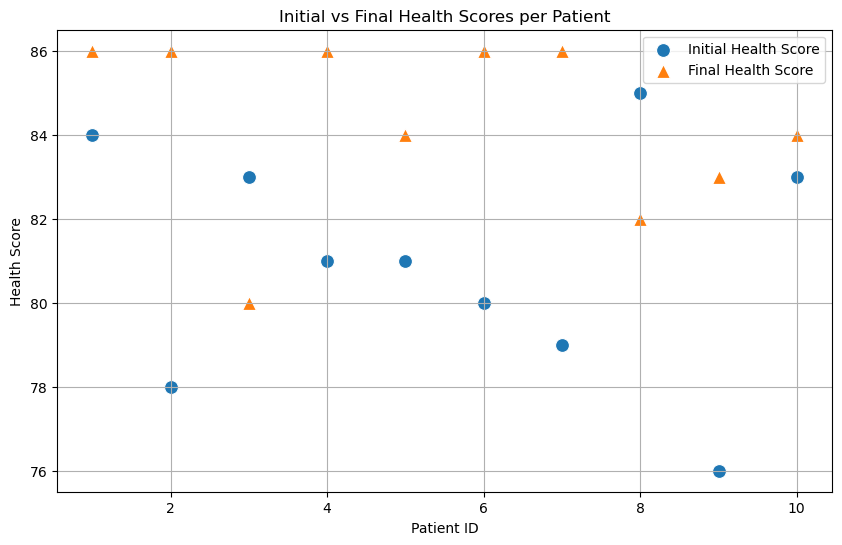

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

csv_url = "https://gist.githubusercontent.com/MeiyuYuan/b8db3469754cb27d3d34495e5d584862/raw/0f60c28271b9d288e87e489f0d2786f3e5555b59/vaccine_data.csv"
df = pd.read_csv(csv_url)

df['HealthScoreDifference'] = df['FinalHealthScore'] - df['InitialHealthScore']

print("Data Overview:")
print(df)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="PatientID", y="InitialHealthScore", label="Initial Health Score", s=100)
sns.scatterplot(data=df, x="PatientID", y="FinalHealthScore", label="Final Health Score", s=100, marker="^")
plt.title("Initial vs Final Health Scores per Patient")
plt.xlabel("Patient ID")
plt.ylabel("Health Score")
plt.legend()
plt.grid()
plt.show()

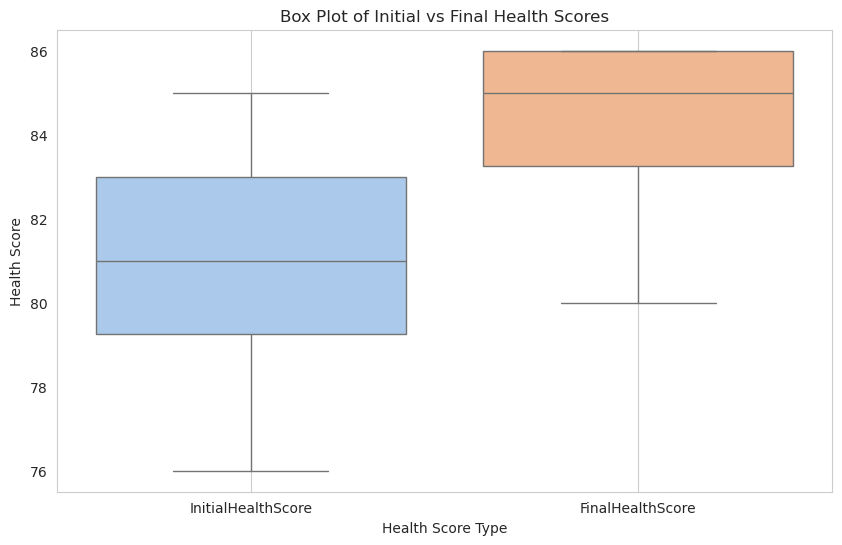

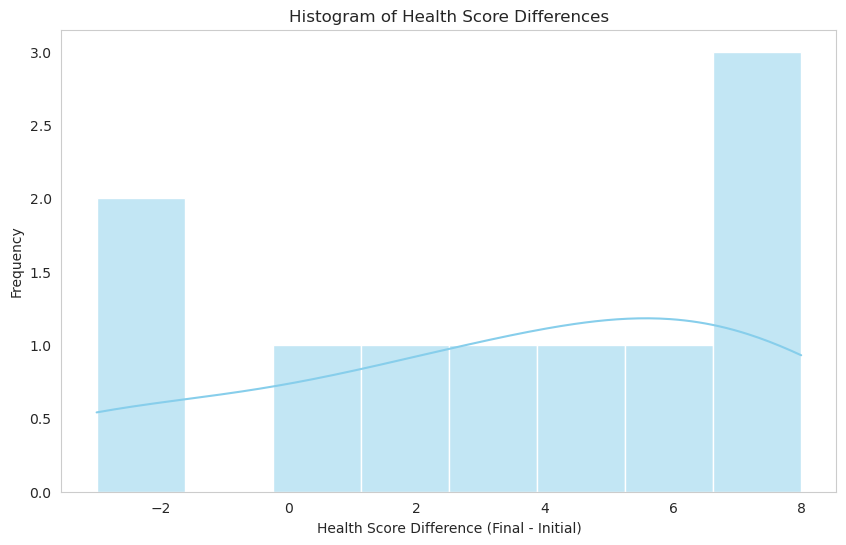

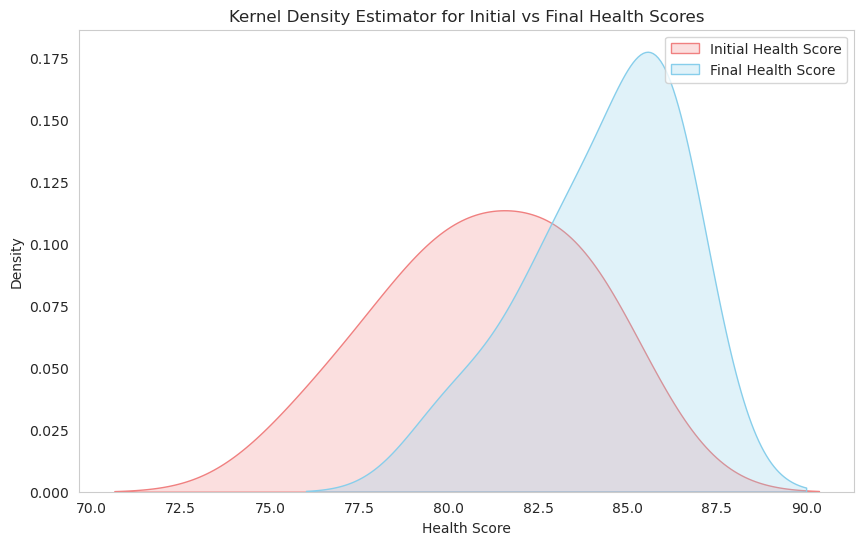

In [4]:
sns.set_style("whitegrid")

# Box Plot to show Initial vs Final Health Scores
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['InitialHealthScore', 'FinalHealthScore']], palette='pastel')
plt.title("Box Plot of Initial vs Final Health Scores")
plt.xlabel("Health Score Type")
plt.ylabel("Health Score")
plt.grid()
plt.show()

# Histogram of Health Score Differences
plt.figure(figsize=(10, 6))
sns.histplot(df['HealthScoreDifference'], bins=8, kde=True, color='skyblue')
plt.title("Histogram of Health Score Differences")
plt.xlabel("Health Score Difference (Final - Initial)")
plt.ylabel("Frequency")
plt.grid()
plt.show()

# Kernel Density Estimate for Initial and Final Health Scores
plt.figure(figsize=(10, 6))
sns.kdeplot(df['InitialHealthScore'], label='Initial Health Score', fill=True, color='lightcoral')
sns.kdeplot(df['FinalHealthScore'], label='Final Health Score', fill=True, color='skyblue')
plt.title("Kernel Density Estimator for Initial vs Final Health Scores")
plt.xlabel("Health Score")
plt.ylabel("Density")
plt.legend()
plt.grid()
plt.show()

    2. Quantitative Analysis：
        We use bootstrapping to sample and estimate the mean difference distribution under the original hypothesis so that we can construct a confidence interval for the mean difference between Final Health Scores and Initial Health Scores. Next, a bootstrap distribution for the mean difference is generated by resampling from the observed difference and recalculating the mean for each sample. After constructing a confidence interval (CI) for the mean difference, determine whether the observed mean difference exceeds the Null distribution. If the CI does not include zeros, which means it does not overlap zeros, then we reject the null hypothesis and conclude that the vaccine is valid. If the CI includes zeros, we cannot reject the original hypothesis, which suggests that the vaccine does not have a significant effect on the health of those who take it.
    
        2.1) Methodology Code and Explanations
            The original hypothesis stated that the vaccine had no effect on patients' health scores, so we used the Bootstrapping method to estimate the distribution of mean differences. In the first place, the mean difference observed between the final health score and the initial health score is calculated. Secondly, the data are randomly resampled using replacement to create many bootstrapd samples. In the third place, for each bootstrap sample, the mean difference is computed. Finally, we estimate confidence intervals by creating a distribution of mean differences from the bootstrap samples.
        
        2.2) Supporting Visualizations
            The red dashed line indicates the observed mean difference. The green dashed lines represent the bounds of the 95% confidence interval. 

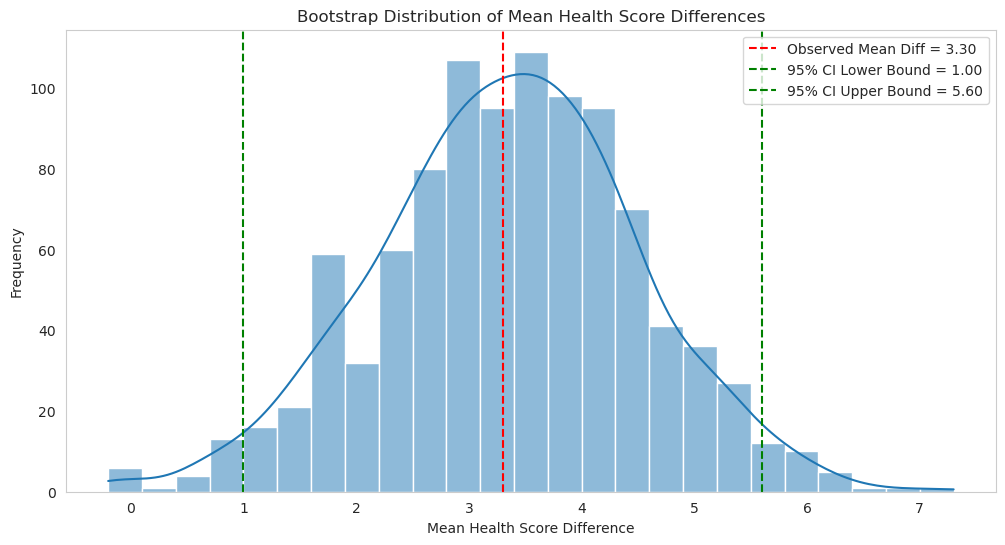

Observed Mean Difference: 3.30
95% Confidence Interval: [1.00, 5.60]


In [5]:
# Set a random seed for reproducibility
np.random.seed(39)

# Observed Mean Difference
observed_mean_diff = df['HealthScoreDifference'].mean()

# Bootstrap Analysis
n_bootstrap_samples = 1000
bootstrap_means = []

for _ in range(n_bootstrap_samples):
    # Resample the differences with replacement
    bootstrap_sample = np.random.choice(df['HealthScoreDifference'], size=len(df), replace=True)
    bootstrap_means.append(np.mean(bootstrap_sample))

# Construct a 95% Confidence Interval
lower_bound = np.percentile(bootstrap_means, 2.5)
upper_bound = np.percentile(bootstrap_means, 97.5)

# Plot the Bootstrap Distribution
plt.figure(figsize=(12, 6))
sns.histplot(bootstrap_means, kde=True)
plt.axvline(observed_mean_diff, color='red', linestyle='--', label=f'Observed Mean Diff = {observed_mean_diff:.2f}')
plt.axvline(lower_bound, color='green', linestyle='--', label=f'95% CI Lower Bound = {lower_bound:.2f}')
plt.axvline(upper_bound, color='green', linestyle='--', label=f'95% CI Upper Bound = {upper_bound:.2f}')
plt.title("Bootstrap Distribution of Mean Health Score Differences")
plt.xlabel("Mean Health Score Difference")
plt.ylabel("Frequency")
plt.legend()
plt.grid()
plt.show()

print(f"Observed Mean Difference: {observed_mean_diff:.2f}")
print(f"95% Confidence Interval: [{lower_bound:.2f}, {upper_bound:.2f}]")

    3. Findings and Discussion:
        The mean difference in health scores that we observed was calculated as positive, indicating an overall improvement in the health of the vaccinated patients. And the 95% confidence interval of the mean difference does not include zero, which indicates that the mean difference is significantly different from zero.
    
        3.1) Conclusion regarding a Null Hypothesis of "no effect"
            On the basis of the bootstraping analysis, we rejected the null hypothesis of 'no effect'. This provides evidence that the vaccine has a positive impact on patient health scores and makes it effective.
    
        3.2) Further Considerations
            Since the original sample size of this dataset was relatively small, the generalizability of the results may be limited. If a larger sample size had been available, we would have been able to obtain more precise estimates of the overall mean difference.

9. Yes.